### DS205229119

#### Lab3. Fuel Amount Prediction using Linear Regression

#### Step1. [Prepare your dataset]. Create fuel_data.csv file as shown above.

In [ ]:
import pandas as pd

dt = pd.read_csv("fuel_data.csv")

dt

#### Step2. [Import dataset]. Using Pandas, import “fuel_data.csv” file and print properties such as head(), shape, columns, type and info.

In [3]:
dt.head()

,drivenKM,fuelAmount
0,390.0,3600.0
1,403.0,3705.0
2,396.5,3471.0
3,383.5,3250.5
4,321.1,3263.7


In [4]:
dt.info

<bound method DataFrame.info of     drivenKM  fuelAmount
0     390.00      3600.0
1     403.00      3705.0
2     396.50      3471.0
3     383.50      3250.5
4     321.10      3263.7
5     391.30      3445.2
6     386.10      3679.0
7     371.80      3744.5
8     404.30      3809.0
9     392.20      3905.0
10    386.43      3874.0
11    395.20      3910.0
12    381.00      4020.7
13    372.00      3622.0
14    397.00      3450.5
15    407.00      4179.0
16    372.40      3454.2
17    375.60      3883.8
18    399.00      4235.9>

In [5]:
dt.columns

Index(['drivenKM', 'fuelAmount'], dtype='object')

In [6]:
type(dt)

pandas.core.frame.DataFrame

In [7]:
dt.shape

(19, 2)

#### Step3. [Preprocessing]. Check for missing values (Use isnull() method)

In [8]:
dt.isnull()

,drivenKM,fuelAmount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### Step4. [Visualize Relationships]. Plot relplot between “drivenKM” and “fuelAmount”.

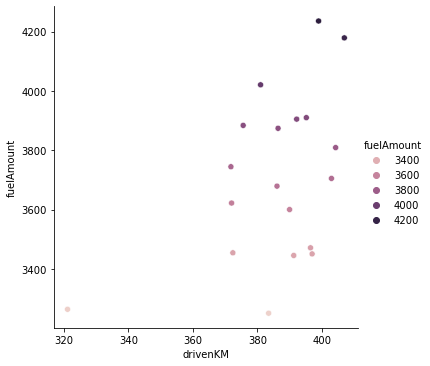

In [9]:
import seaborn as sns
sns.relplot(data=dt, x='drivenKM', y='fuelAmount',hue='fuelAmount');

#### Step5. [Prepare X matrix and y vector]. Extract “drivenKM” column and store into new dataframe X. Similarly, extract “fuelAmount” and store into y.

In [10]:
y = dt.fuelAmount

In [11]:
data1 = ['drivenKM']
X=dt[data1]

#### Step6. [Examine X and y]. Print X, y, type of X and type of y.

In [12]:
X

,drivenKM
0,390.00
1,403.00
2,396.50
3,383.50
4,321.10
5,391.30
6,386.10
7,371.80
8,404.30
9,392.20


In [13]:
y

0     3600.0
1     3705.0
2     3471.0
3     3250.5
4     3263.7
5     3445.2
6     3679.0
7     3744.5
8     3809.0
9     3905.0
10    3874.0
11    3910.0
12    4020.7
13    3622.0
14    3450.5
15    4179.0
16    3454.2
17    3883.8
18    4235.9
Name: fuelAmount, dtype: float64

In [14]:
print(X.dtypes)
print(y.dtypes)

drivenKM    float64
dtype: object
float64


In [15]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Step7. [Split dataset]. Split dataset into 4 parts using train_test_split() method, such as X_train, X_test, y_train and y_test. Use 20% for test size. Later you can play around with this test size. Print the shape of all 4 parts.¶

In [16]:
import sklearn
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2) 

In [18]:
X_train, X_test, y_train, y_test

(    drivenKM
 13     372.0
 1      403.0
 6      386.1
 15     407.0
 18     399.0
 9      392.2
 8      404.3
 0      390.0
 16     372.4
 4      321.1
 14     397.0
 2      396.5
 11     395.2
 5      391.3
 17     375.6,
     drivenKM
 10    386.43
 3     383.50
 7     371.80
 12    381.00,
 13    3622.0
 1     3705.0
 6     3679.0
 15    4179.0
 18    4235.9
 9     3905.0
 8     3809.0
 0     3600.0
 16    3454.2
 4     3263.7
 14    3450.5
 2     3471.0
 11    3910.0
 5     3445.2
 17    3883.8
 Name: fuelAmount, dtype: float64,
 10    3874.0
 3     3250.5
 7     3744.5
 12    4020.7
 Name: fuelAmount, dtype: float64)

In [19]:
X_train.shape

(15, 1)

In [20]:
X_test.shape

(4, 1)

In [21]:
y_train.shape

(15,)

In [22]:
y_test.shape

(4,)

#### Part-I. Linear Regression Baseline Model
#### Step8. [Build Model]. Create Linear Regression model and train with fit() using X_train and y_train values.

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

#### Step9. [Predict price for 800 KM]. If I need to travel 800 KM, how much do I need to spend on Diesel?

In [25]:
new =[[800]]
pp = model.predict(new)
pp

array([6723.21145113])

#### Step10. [Predict on entire dataset]. Now, perform prediction using entire X_test and store result as y_pred

In [26]:
y_pred = model.predict(X_test)
y_pred

array([3704.51203095, 3683.12559262, 3597.72582181, 3664.87777834])

#### Step11. [Print Mean Squared Error and R2 Error]. Are you getting output “MSE: 46181.0”. Also, print values of model parameters: coef_ and intercept_ values.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_mse

91010.79696263855

In [71]:
r2_score(y_test,y_pred)

-0.08623089259692729

In [72]:
model.coef_

array([7.29912571])

In [73]:
model.intercept_

883.9108825705807

#### Part-II. Linear Regression with Scaling using StandardScaler
#### Step12. [Normalize X_train and X_test values]. Use StandardScaler, scale X_train using fit_transform() method and X_test using transform() method.

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
ss = scaler.fit_transform(X_train)
print(ss)

[[-0.72314168]
 [ 0.78678594]
 [-0.03636815]
 [ 0.98161531]
 [ 0.59195657]
 [ 0.26074664]
 [ 0.85010548]
 [ 0.15359049]
 [-0.70365874]
 [-3.2023454 ]
 [ 0.49454188]
 [ 0.47018821]
 [ 0.40686867]
 [ 0.21691003]
 [-0.54779524]]


In [76]:
scaler = StandardScaler()
ss1 = scaler.fit_transform(X_test)
print(ss1)

[[ 1.049469  ]
 [ 0.51446349]
 [-1.62190664]
 [ 0.05797415]]


#### Step13. [Build LR model]. Create a new LR model, fit on scaled X_train and predict on scaled X_test

In [77]:
lrmodel1 = LinearRegression()
lrmodel1.fit(ss,y_train)

LinearRegression()

In [78]:
s_y_pred = lrmodel1.predict(ss1)
s_y_pred

array([3864.82338327, 3784.64917774, 3464.49961979, 3716.24115253])

#### Step14. [Print Mean Squared Error and R2 Error]. What is the output?. MSE reduced or not?. Why?.

In [79]:
mean_squared_error(y_test,s_y_pred)

114123.73927149162

In [80]:
r2_score(y_test,s_y_pred)

-0.3620881841773229

#### Step15. [Plot scatter plot]. Display Scatter Plot between actual y (aka ground truth) vs predicted y values. That is, between y_test and y_pred.

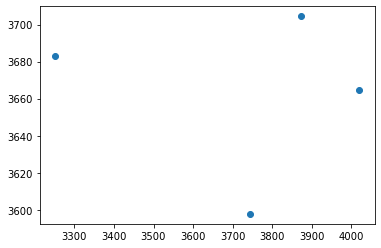

In [81]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

#### Part-III. Linear Regression with Scaling using MinMaxScaler and Comparison with KNeighborsRegressor and SGDRegressor
#### Step16. [Repeat with MinmaxScaler]. Repeat scaling using MinMaxScaler, LR model creation, fit, predict and error computation steps.

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()
ss3=scaler.fit_transform(X_train)   
ss3

array([[0.59254948],
       [0.95343423],
       [0.75669383],
       [1.        ],
       [0.90686845],
       [0.82770664],
       [0.9685681 ],
       [0.80209546],
       [0.59720605],
       [0.        ],
       [0.88358556],
       [0.87776484],
       [0.86263097],
       [0.81722934],
       [0.63445867]])

In [84]:
m_ss1 = scaler.transform(X_test)
m_ss1

array([[0.76053551],
       [0.72642608],
       [0.59022119],
       [0.69732247]])

In [85]:
model2 = LinearRegression()
model2.fit(ss3,y_train)

LinearRegression()

In [86]:
ms_y_pred = model2.predict(m_ss1)
ms_y_pred

array([3704.51203095, 3683.12559262, 3597.72582181, 3664.87777834])

In [87]:
mean_squared_error(y_test,ms_y_pred)

91010.7969626385

In [88]:
r2_score(y_test,ms_y_pred)

-0.08623089259692662

#### Step17. [Compare KNN Regressor]. Repeat the above steps for KNeighborsRegressor model and compare MSE of LR with KNN Regressor.

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
mod_neigh = KNeighborsRegressor(n_neighbors=5)
mod_neigh.fit(X,y)

KNeighborsRegressor()

In [91]:
n_y_pred = mod_neigh.predict(X)
n_y_pred


array([3700.64, 3875.88, 3794.48, 3684.84, 3593.64, 3746.84, 3684.84,
       3745.04, 3875.88, 3666.24, 3569.74, 3794.48, 3741.6 , 3745.04,
       3794.48, 3875.88, 3745.04, 3745.04, 3754.48])

In [92]:
knn_mse = mean_squared_error(y,n_y_pred)
knn_mse

70460.30507368421

In [93]:
r2_score(y,n_y_pred)

0.06403925984775638

#### Step18. [Compare SGD Regressor]. Repeat the above steps for SGDRegressor model and compare MSE of LR with SGD Regressor.

In [94]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

In [95]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [96]:
r_y_pred = reg.predict(X)
r_y_pred

array([3740.88089055, 3830.60556632, 3785.74322843, 3696.01855266,
       3265.34010893, 3749.85335812, 3713.96348781, 3615.26634446,
       3839.5780339 , 3756.06506645, 3716.2411142 , 3776.77076086,
       3678.76380732, 3616.64672409, 3789.1941775 , 3858.21315887,
       3619.40748334, 3641.49355738, 3802.99797378])

In [97]:
sgdr_mse = mean_squared_error(y,r_y_pred)
sgdr_mse

58823.47276544006

In [98]:
r2_score(y,r_y_pred)

0.21861733283313123

#### Step19. [Select best model]. Tabulate MSE values of LR, KNNR and SGDR and select the model with the lowest MSE.

In [99]:
print('LR model ',lr_mse)
print('KNNR model ',knn_mse)
print('SGDR model ',sgdr_mse)

LR model  91010.79696263855
KNNR model  70460.30507368421
SGDR model  58823.47276544006
